In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Clustering Data.csv')
df.head()

,District,Area,Type,Good,Electricity,Television,Owned,Rented
0,Araria,District - Araria,Total,32.7,7.7,7.2,98.0,1.1
1,Araria,District - Araria,Rural,31.9,4.7,5.4,98.7,0.6
2,Araria,District - Araria,Urban,45.1,57.8,37.2,86.7,10.1
3,Araria,Sub-Dist - Araria,Total,36.9,11.5,8.4,97.0,2.0
4,Araria,Sub-Dist - Araria,Rural,35.4,4.5,4.0,98.6,0.6


In [2]:
df1 = df.drop(columns = ['Area'])
#Since there are too many categories , it acts as a unique identifier)

In [3]:
X = df[['Good','Electricity','Television','Owned','Rented']]
X.head()

,Good,Electricity,Television,Owned,Rented
0,32.7,7.7,7.2,98.0,1.1
1,31.9,4.7,5.4,98.7,0.6
2,45.1,57.8,37.2,86.7,10.1
3,36.9,11.5,8.4,97.0,2.0
4,35.4,4.5,4.0,98.6,0.6


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
#finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

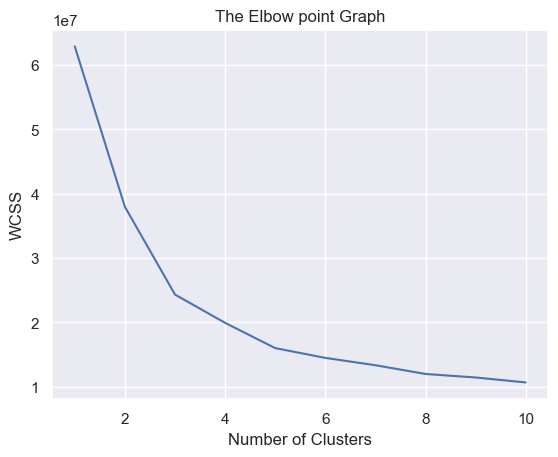

In [6]:
#plot elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## We choose 3 clusters 

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,init = 'k-means++',random_state=0)

Y = kmeans.fit_predict(X)

print(Y)

[0 0 2 ... 1 1 1]


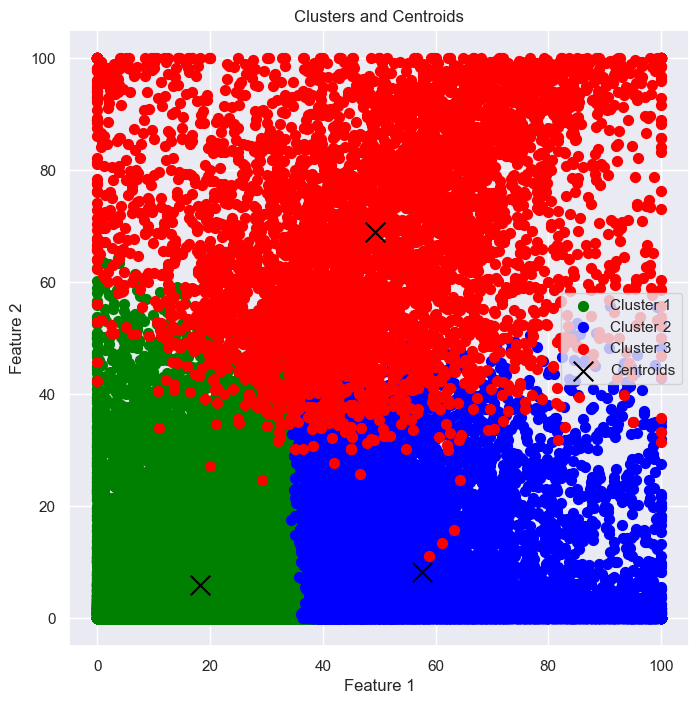

In [18]:
#plotting all clusters and their centroids

# Assuming X is a Pandas DataFrame
plt.figure(figsize=(8,8))

# Use .iloc to access rows and columns by index
plt.scatter(X.iloc[Y==0, 0], X.iloc[Y==0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X.iloc[Y==1, 0], X.iloc[Y==1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X.iloc[Y==2, 0], X.iloc[Y==2, 1], s=50, c='red', label='Cluster 3')

# Scatter plot for centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='x', label='Centroids')

plt.title('Clusters and Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
Y.shape

(44098,)

In [21]:
X['cluster'] = Y
X.head()

C:\Users\shree02\AppData\Local\Temp\ipykernel_15472\3070220496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = Y


,Good,Electricity,Television,Owned,Rented,cluster
0,32.7,7.7,7.2,98.0,1.1,0
1,31.9,4.7,5.4,98.7,0.6,0
2,45.1,57.8,37.2,86.7,10.1,2
3,36.9,11.5,8.4,97.0,2.0,0
4,35.4,4.5,4.0,98.6,0.6,0


In [25]:
df2 = df.drop(columns = ['Good','Electricity',	'Television','Owned','Rented'])
df_combined = pd.concat([X, df2], axis=1)


In [26]:
df_combined.head()

,Good,Electricity,Television,Owned,Rented,cluster,District,Area,Type
0,32.7,7.7,7.2,98.0,1.1,0,Araria,District - Araria,Total
1,31.9,4.7,5.4,98.7,0.6,0,Araria,District - Araria,Rural
2,45.1,57.8,37.2,86.7,10.1,2,Araria,District - Araria,Urban
3,36.9,11.5,8.4,97.0,2.0,0,Araria,Sub-Dist - Araria,Total
4,35.4,4.5,4.0,98.6,0.6,0,Araria,Sub-Dist - Araria,Rural


In [27]:
df3 = df_combined.reindex(columns=['District', 'Area', 'Type','Good','Electricity','Television','Owned','Rented','cluster'])

df3.head()

,District,Area,Type,Good,Electricity,Television,Owned,Rented,cluster
0,Araria,District - Araria,Total,32.7,7.7,7.2,98.0,1.1,0
1,Araria,District - Araria,Rural,31.9,4.7,5.4,98.7,0.6,0
2,Araria,District - Araria,Urban,45.1,57.8,37.2,86.7,10.1,2
3,Araria,Sub-Dist - Araria,Total,36.9,11.5,8.4,97.0,2.0,0
4,Araria,Sub-Dist - Araria,Rural,35.4,4.5,4.0,98.6,0.6,0


In [28]:
df3.to_csv('Segmented_data.csv', index=False)

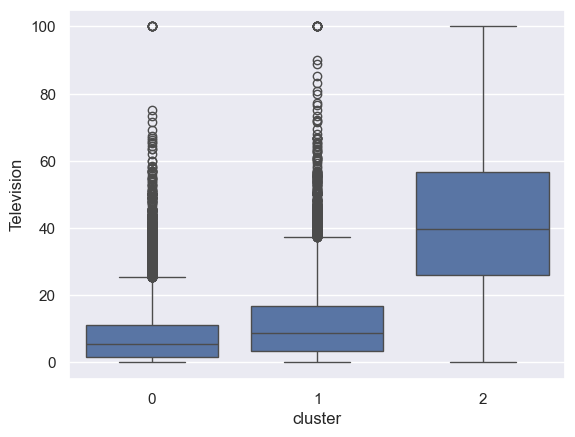

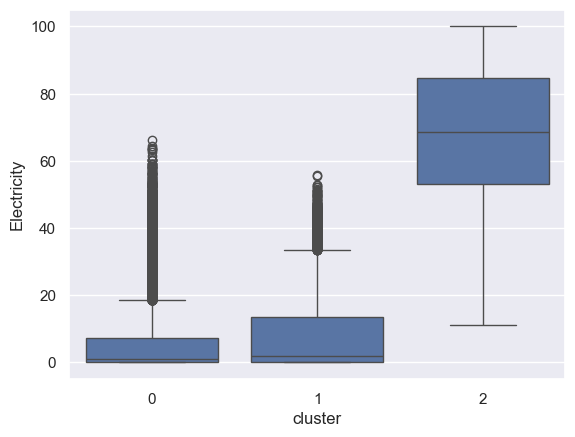

In [34]:

# Create box plots for each feature grouped by the 'Cluster' column
sns.boxplot(x='cluster', y='Television', data=df3)
plt.show()

sns.boxplot(x='cluster', y='Electricity', data=df3)
plt.show()




## Hence , cluster 2 has higher % of households with Electricity and Television


In [35]:
frequency = df3['cluster'].value_counts()

print(frequency)

cluster
0    25069
1    13823
2     5206
Name: count, dtype: int64


## Therefore for increasing T.V sales in bihar, the T.V company has to focus on 5206 areas for marketing
